pygame 2.5.0 (SDL 2.28.0, Python 3.11.4)
Hello from the pygame community. https://www.pygame.org/contribute.html
Device:  cuda


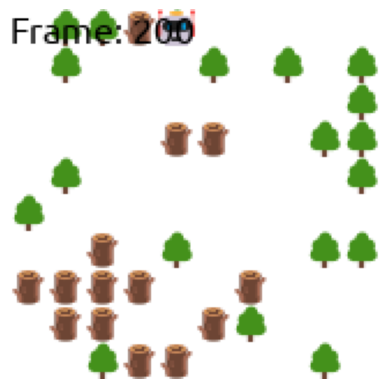

In [1]:
import torch
from gridworld.agent import Agent
from gridworld.rendering import run_simulation_with_rendering
from gridworld.exploration import ExplorationMethod, Greedy
from gridworld.tile_types import TileType
from gridworld.world import LoggerTrainingWorld
from models.ann import DeepQNet

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print('Device: ', device)

agent = Agent()

model_filename = 'policy_2023-07-19_04-28.pth'
policy = DeepQNet()
policy.load_state_dict(torch.load(model_filename))
policy = policy.to(device)

instances = {
    TileType.tree.value: 40,
    TileType.log.value: 0
}
world = LoggerTrainingWorld()
world.reset(instances)
exploration_method: ExplorationMethod = Greedy(device)
duration = run_simulation_with_rendering(policy, world, device, exploration_method, file_name='simuation.gif', frame_rate=6, max_duration=200);